In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
provider1 = pd.read_csv('./Downloads/Provider1_Usecase2.csv',sep=';')

In [3]:
provider1['Timestamp']=provider1['Datekey'].astype('str')+provider1['Hour'].astype('str')
provider1

Datekey  ProviderId   Hour  WindSpeed  WindDirection  Temperature  \
0      20200101           1  00:00        2.0          317.0          5.3   
1      20200101           1  01:00        1.9          284.0          5.1   
2      20200101           1  02:00        2.0          270.0          4.8   
3      20200101           1  03:00        2.2          273.0          4.6   
4      20200101           1  04:00        2.2          282.0          4.4   
...         ...         ...    ...        ...            ...          ...   
12523  20210605           1  19:00        3.5           12.0         19.0   
12524  20210605           1  20:00        3.2           15.0         18.3   
12525  20210605           1  21:00        2.9           21.0         17.5   
12526  20210605           1  22:00        2.7           32.0         16.9   
12527  20210605           1  23:00        2.7           37.0         16.2   

       Pressure  Humidity  PowerWOAvailability      Timestamp  
0        100944     80.57                1.398  2020010100:00  
1        100920     79.70                1.992  2020010101:00  
2        100895     78.84                2.285  2020010102:00  
3        100875     77.98                5.529  2020010103:00  
4        100857     75.21                5.284  2020010104:00  
...         ...       ...                  ...            ...  
12523    100454     64.95                8.471  2021060519:00  
12524    100546     68.61                6.673  2021060520:00  
12525    100544     72.26                5.775  2021060521:00  
12526    100547     72.88                4.913  2021060522:00  
12527    100550     73.50                3.558  2021060523:00  

[12528 rows x 10 columns]

# Exploratory Data Analysis

In [4]:
provider1['Datekey']=pd.to_datetime(provider1['Datekey'],format=('%Y%m%d'))
provider1['Timestamp']=pd.to_datetime(provider1['Timestamp'],format=('%Y%m%d%H:%M'))
provider1

Datekey  ProviderId   Hour  WindSpeed  WindDirection  Temperature  \
0     2020-01-01           1  00:00        2.0          317.0          5.3   
1     2020-01-01           1  01:00        1.9          284.0          5.1   
2     2020-01-01           1  02:00        2.0          270.0          4.8   
3     2020-01-01           1  03:00        2.2          273.0          4.6   
4     2020-01-01           1  04:00        2.2          282.0          4.4   
...          ...         ...    ...        ...            ...          ...   
12523 2021-06-05           1  19:00        3.5           12.0         19.0   
12524 2021-06-05           1  20:00        3.2           15.0         18.3   
12525 2021-06-05           1  21:00        2.9           21.0         17.5   
12526 2021-06-05           1  22:00        2.7           32.0         16.9   
12527 2021-06-05           1  23:00        2.7           37.0         16.2   

       Pressure  Humidity  PowerWOAvailability           Timestamp  
0        100944     80.57                1.398 2020-01-01 00:00:00  
1        100920     79.70                1.992 2020-01-01 01:00:00  
2        100895     78.84                2.285 2020-01-01 02:00:00  
3        100875     77.98                5.529 2020-01-01 03:00:00  
4        100857     75.21                5.284 2020-01-01 04:00:00  
...         ...       ...                  ...                 ...  
12523    100454     64.95                8.471 2021-06-05 19:00:00  
12524    100546     68.61                6.673 2021-06-05 20:00:00  
12525    100544     72.26                5.775 2021-06-05 21:00:00  
12526    100547     72.88                4.913 2021-06-05 22:00:00  
12527    100550     73.50                3.558 2021-06-05 23:00:00  

[12528 rows x 10 columns]

In [5]:
def degToCompass(num):
    val=int((num/45)+.5)
    arr=["N","NE","E", "SE","S","SW","W","NW"]
    return arr[(val % 8)]
provider1['direction']=provider1['WindDirection'].apply(degToCompass)
provider1

Datekey  ProviderId   Hour  WindSpeed  WindDirection  Temperature  \
0     2020-01-01           1  00:00        2.0          317.0          5.3   
1     2020-01-01           1  01:00        1.9          284.0          5.1   
2     2020-01-01           1  02:00        2.0          270.0          4.8   
3     2020-01-01           1  03:00        2.2          273.0          4.6   
4     2020-01-01           1  04:00        2.2          282.0          4.4   
...          ...         ...    ...        ...            ...          ...   
12523 2021-06-05           1  19:00        3.5           12.0         19.0   
12524 2021-06-05           1  20:00        3.2           15.0         18.3   
12525 2021-06-05           1  21:00        2.9           21.0         17.5   
12526 2021-06-05           1  22:00        2.7           32.0         16.9   
12527 2021-06-05           1  23:00        2.7           37.0         16.2   

       Pressure  Humidity  PowerWOAvailability           Timestamp direction  
0        100944     80.57                1.398 2020-01-01 00:00:00        NW  
1        100920     79.70                1.992 2020-01-01 01:00:00         W  
2        100895     78.84                2.285 2020-01-01 02:00:00         W  
3        100875     77.98                5.529 2020-01-01 03:00:00         W  
4        100857     75.21                5.284 2020-01-01 04:00:00         W  
...         ...       ...                  ...                 ...       ...  
12523    100454     64.95                8.471 2021-06-05 19:00:00         N  
12524    100546     68.61                6.673 2021-06-05 20:00:00         N  
12525    100544     72.26                5.775 2021-06-05 21:00:00         N  
12526    100547     72.88                4.913 2021-06-05 22:00:00        NE  
12527    100550     73.50                3.558 2021-06-05 23:00:00        NE  

[12528 rows x 11 columns]

In [6]:
from windrose import WindroseAxes

In [7]:
provider1['Datekey'].max()-provider1['Datekey'].min()

Timedelta('521 days 00:00:00')

We have 521 days of data

In [8]:
provider1.drop(columns=['Datekey','ProviderId','Hour'],inplace=True)
provider1.corr()

WindSpeed  WindDirection  Temperature  Pressure  \
WindSpeed             1.000000      -0.351885    -0.047877  0.048860   
WindDirection        -0.351885       1.000000    -0.035725 -0.231749   
Temperature          -0.047877      -0.035725     1.000000 -0.546265   
Pressure              0.048860      -0.231749    -0.546265  1.000000   
Humidity              0.174840      -0.171903    -0.314375  0.055316   
PowerWOAvailability   0.914646      -0.282971    -0.076875  0.027896   

                     Humidity  PowerWOAvailability  
WindSpeed            0.174840             0.914646  
WindDirection       -0.171903            -0.282971  
Temperature         -0.314375            -0.076875  
Pressure             0.055316             0.027896  
Humidity             1.000000             0.113333  
PowerWOAvailability  0.113333             1.000000

Text(0.5, 1.0, 'Correlation Matrix for Provider1 Dataset')

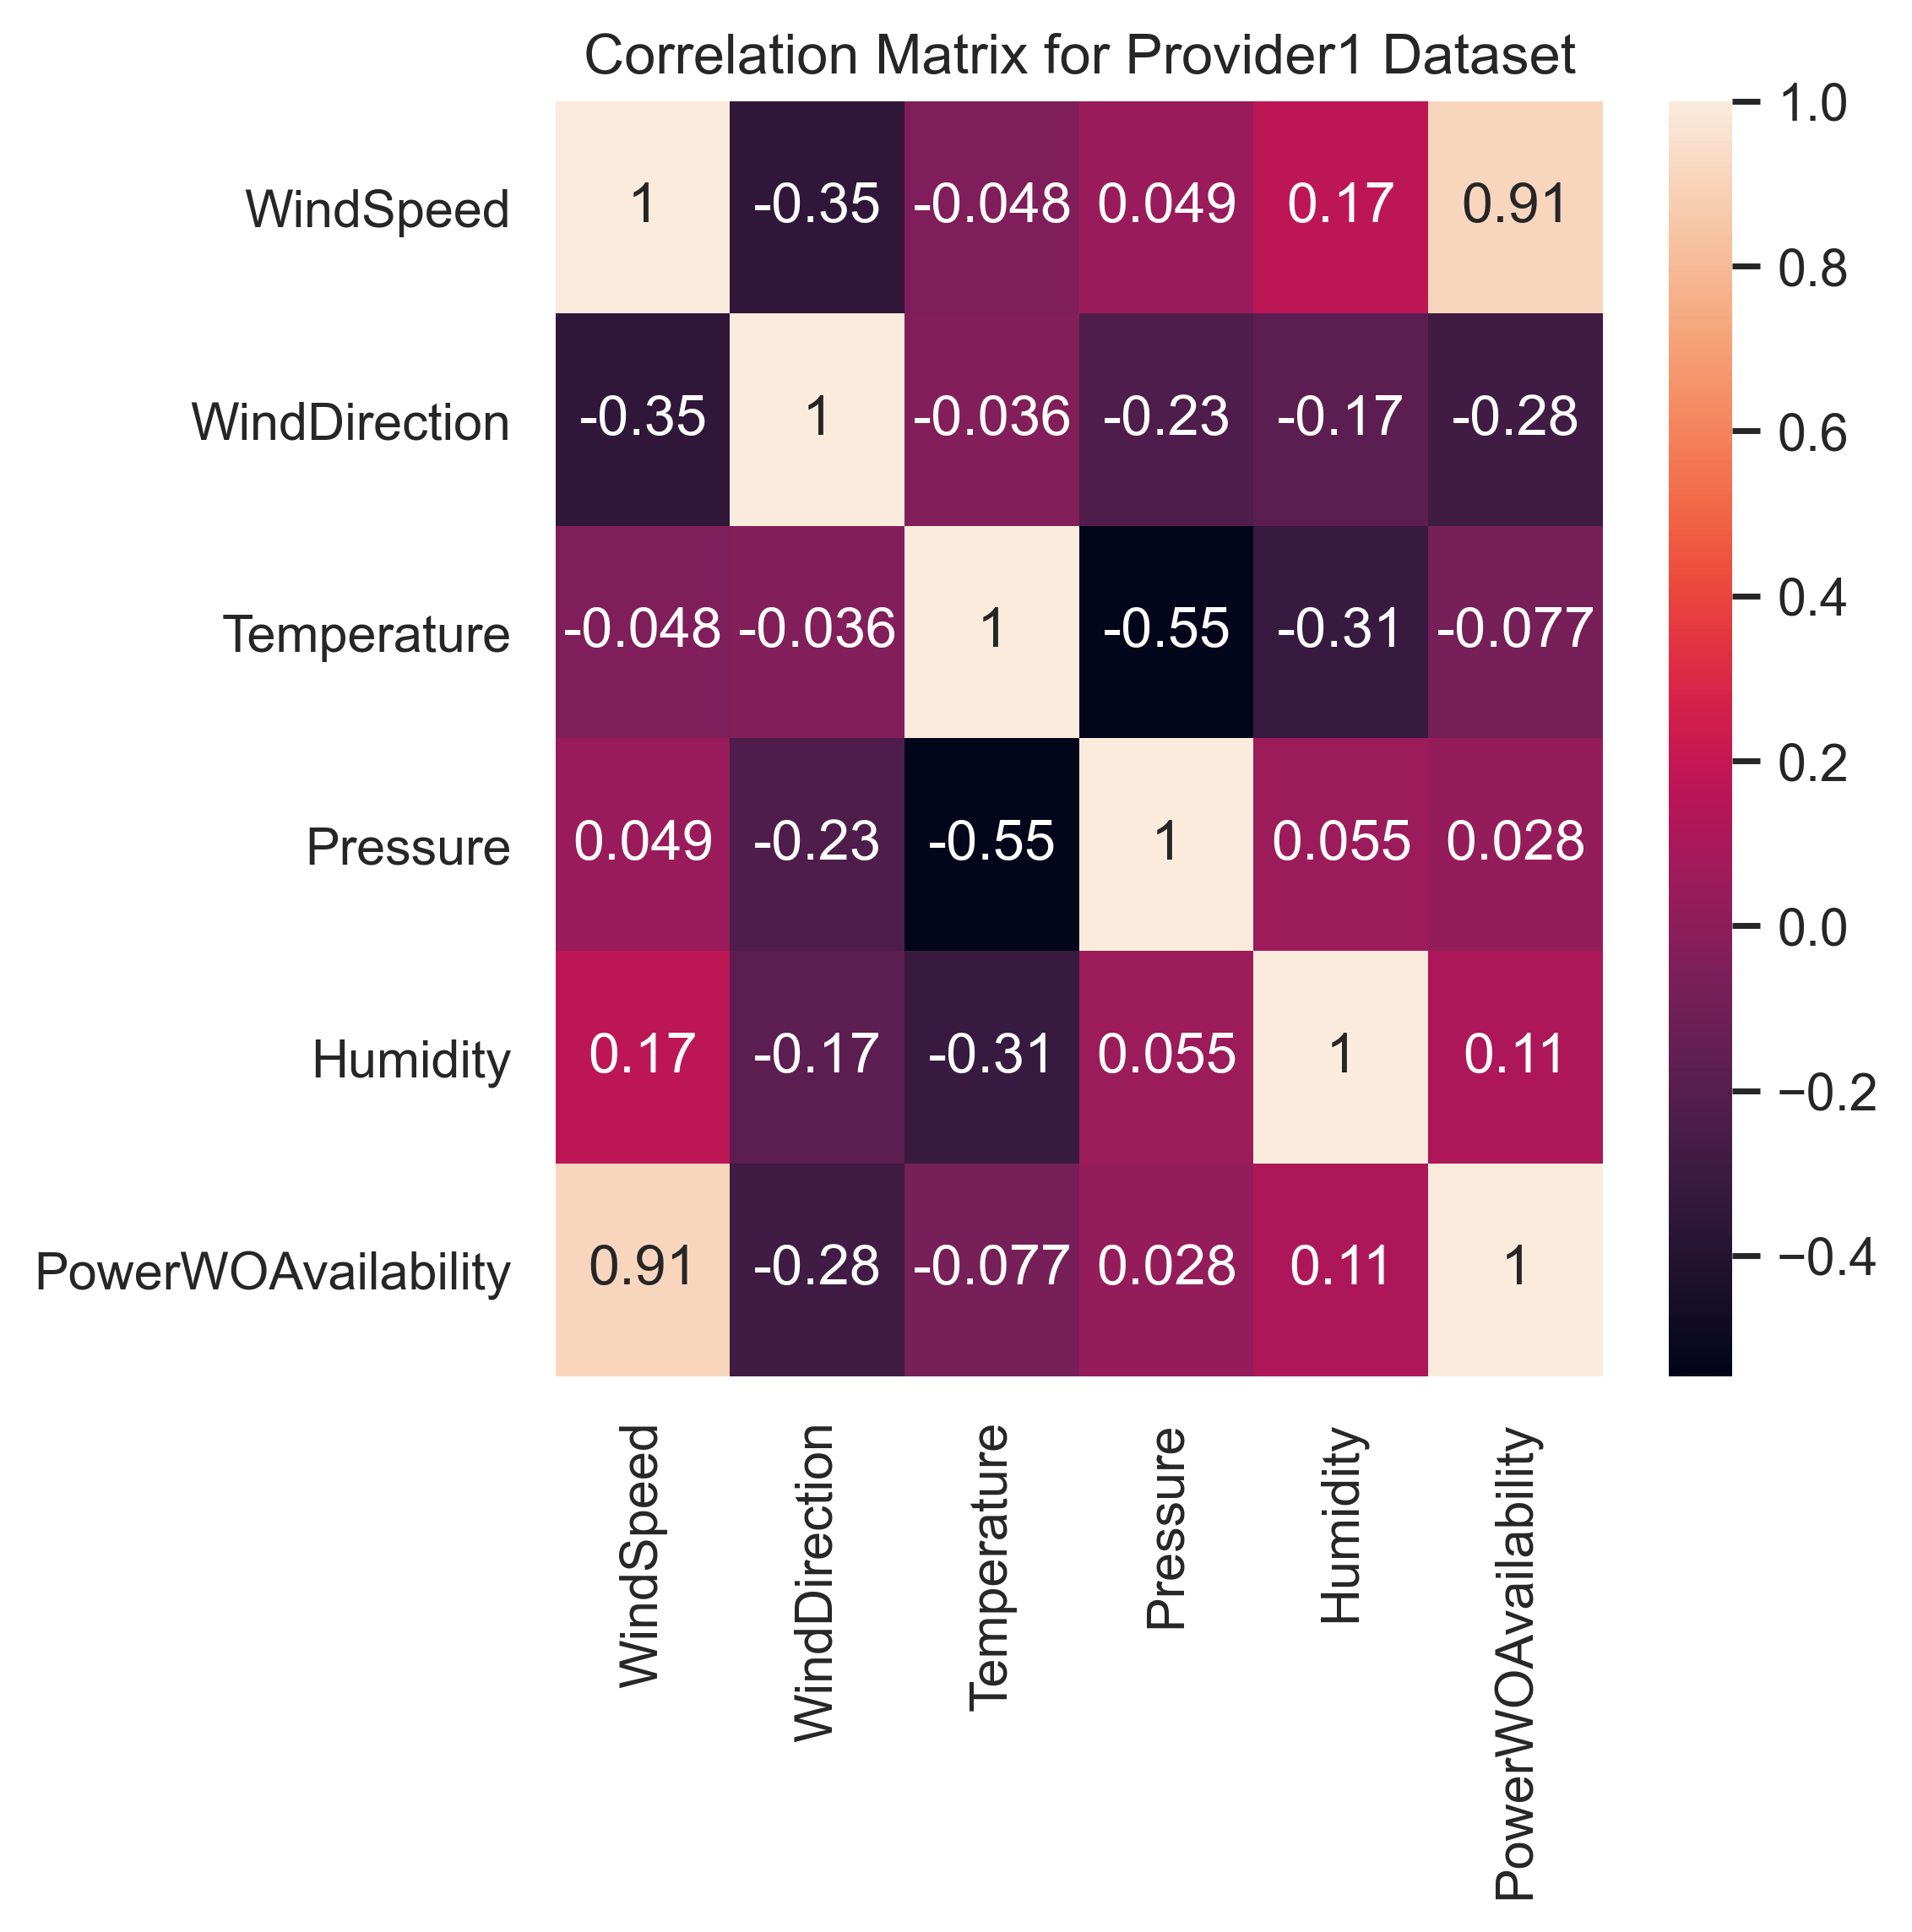

In [9]:
sns.set()
plt.figure(figsize=(5,5),dpi=400)
sns.heatmap(provider1.corr(),annot=True)
plt.title('Correlation Matrix for Provider1 Dataset')

In [10]:
provider1['Month']=provider1['Timestamp'].dt.month_name()
provider1

WindSpeed  WindDirection  Temperature  Pressure  Humidity  \
0            2.0          317.0          5.3    100944     80.57   
1            1.9          284.0          5.1    100920     79.70   
2            2.0          270.0          4.8    100895     78.84   
3            2.2          273.0          4.6    100875     77.98   
4            2.2          282.0          4.4    100857     75.21   
...          ...            ...          ...       ...       ...   
12523        3.5           12.0         19.0    100454     64.95   
12524        3.2           15.0         18.3    100546     68.61   
12525        2.9           21.0         17.5    100544     72.26   
12526        2.7           32.0         16.9    100547     72.88   
12527        2.7           37.0         16.2    100550     73.50   

       PowerWOAvailability           Timestamp direction    Month  
0                    1.398 2020-01-01 00:00:00        NW  January  
1                    1.992 2020-01-01 01:00:00         W  January  
2                    2.285 2020-01-01 02:00:00         W  January  
3                    5.529 2020-01-01 03:00:00         W  January  
4                    5.284 2020-01-01 04:00:00         W  January  
...                    ...                 ...       ...      ...  
12523                8.471 2021-06-05 19:00:00         N     June  
12524                6.673 2021-06-05 20:00:00         N     June  
12525                5.775 2021-06-05 21:00:00         N     June  
12526                4.913 2021-06-05 22:00:00        NE     June  
12527                3.558 2021-06-05 23:00:00        NE     June  

[12528 rows x 9 columns]

<Figure size 4320x360 with 0 Axes>

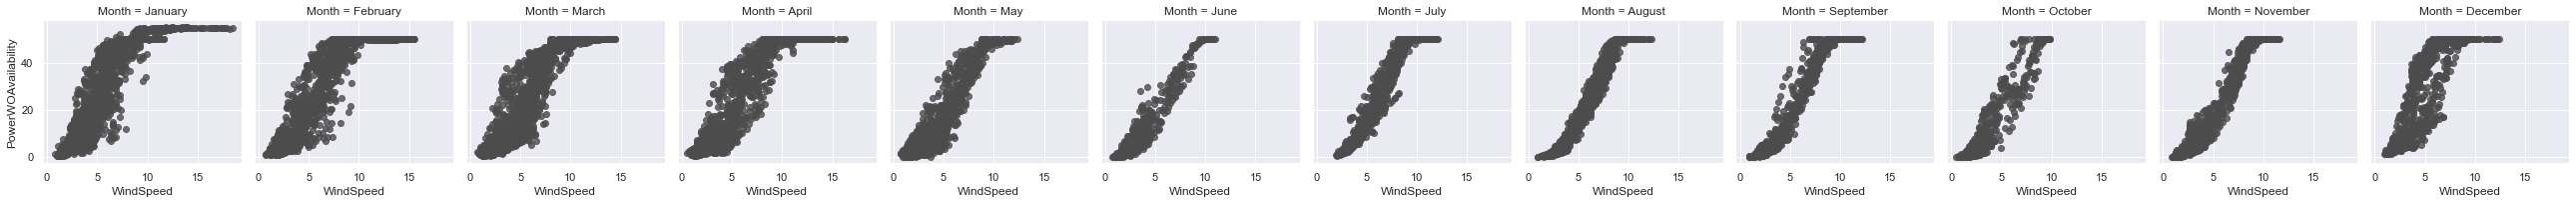

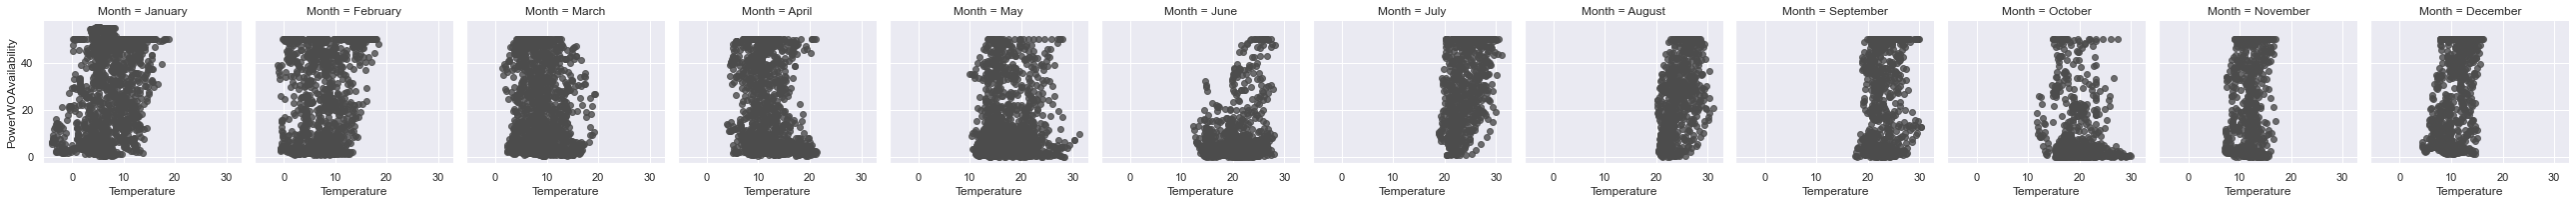

In [11]:
plt.figure(figsize=(60,5))
sea = sns.FacetGrid(provider1,col = "Month", margin_titles = True)
sea.map(sns.regplot, "WindSpeed", "PowerWOAvailability", color = ".3",fit_reg = False)
sea2 = sns.FacetGrid(provider1,col = "Month", margin_titles = True)
sea2.map(sns.regplot, "Temperature", "PowerWOAvailability", color = ".3",fit_reg = False)

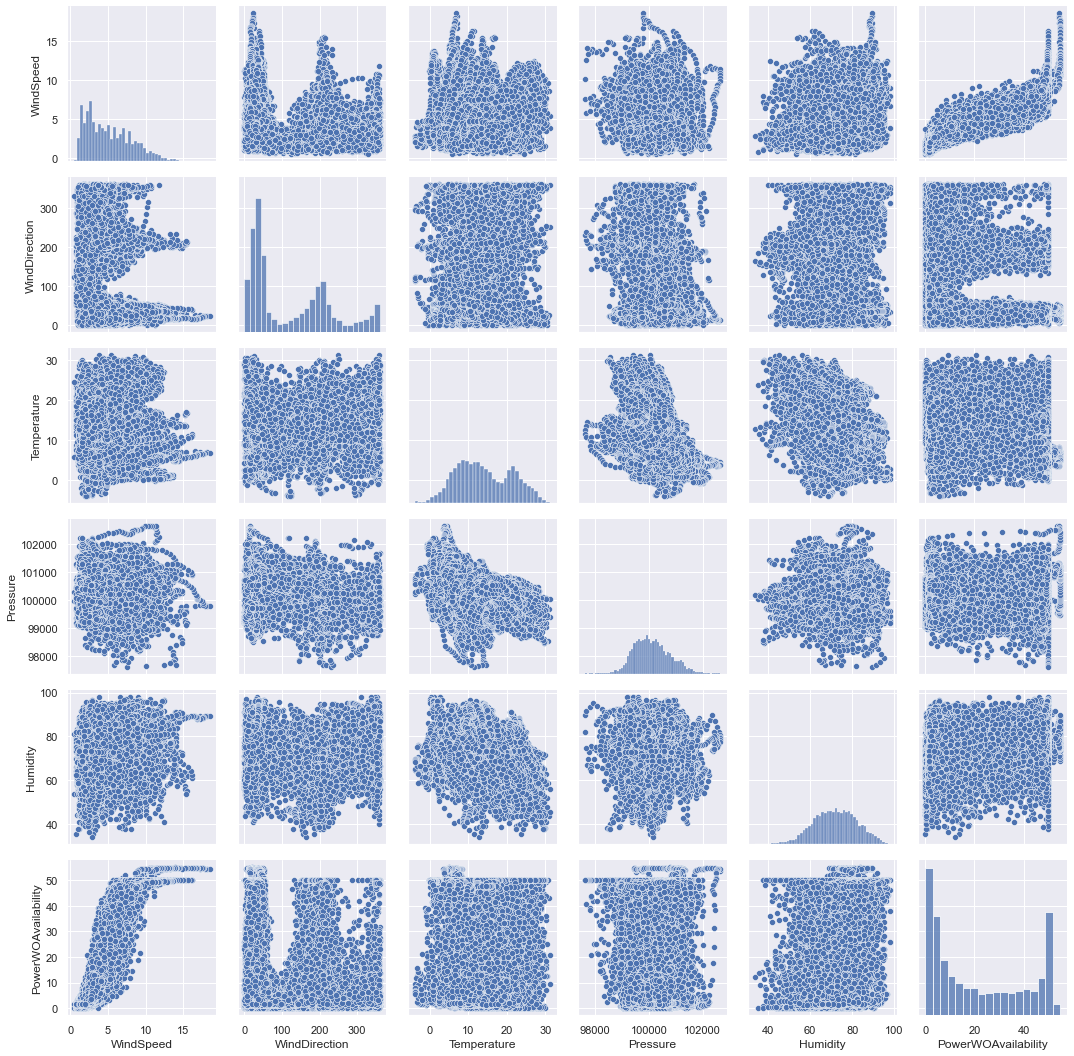

In [12]:
g = sns.PairGrid(provider1)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [13]:
provider1['Timestamp'].dt.month_name()

0        January
1        January
2        January
3        January
4        January
          ...   
12523       June
12524       June
12525       June
12526       June
12527       June
Name: Timestamp, Length: 12528, dtype: object

<AxesSubplot:xlabel='WindSpeed', ylabel='PowerWOAvailability'>

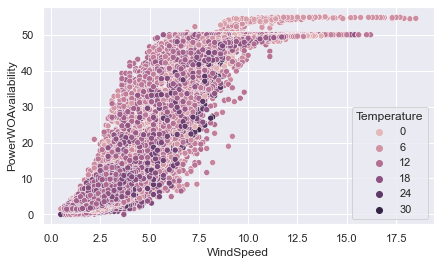

In [14]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=provider1,x='WindSpeed',y='PowerWOAvailability',hue="Temperature")

<AxesSubplot:xlabel='WindSpeed', ylabel='PowerWOAvailability'>

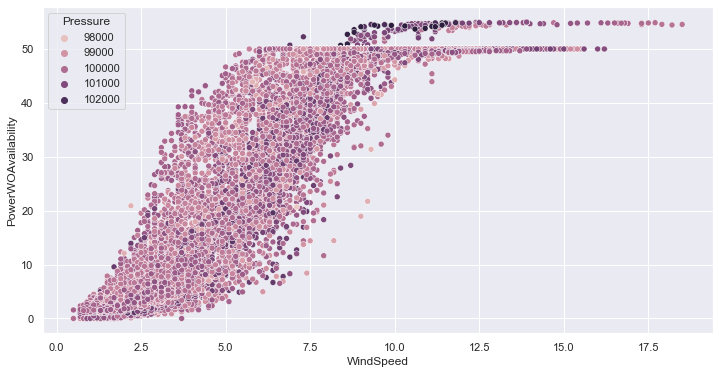

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=provider1,x='WindSpeed',y='PowerWOAvailability',hue="Pressure")

Power Availability's max points where its around 55, most values have high pressure and low temperature.

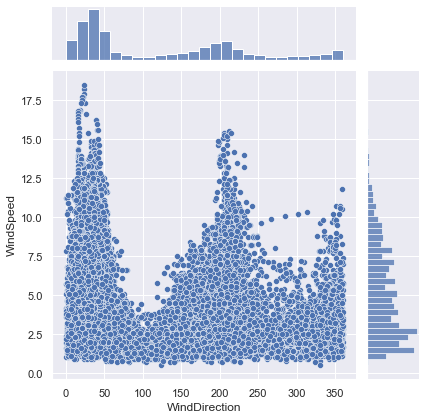

In [16]:
sns.jointplot(data=provider1, x="WindDirection", y="WindSpeed")
#plt.title('Distributions of Wind Speed and Wind Direction')

Text(0.5, 1.08, 'Wind Direction and Power Production Distribution')

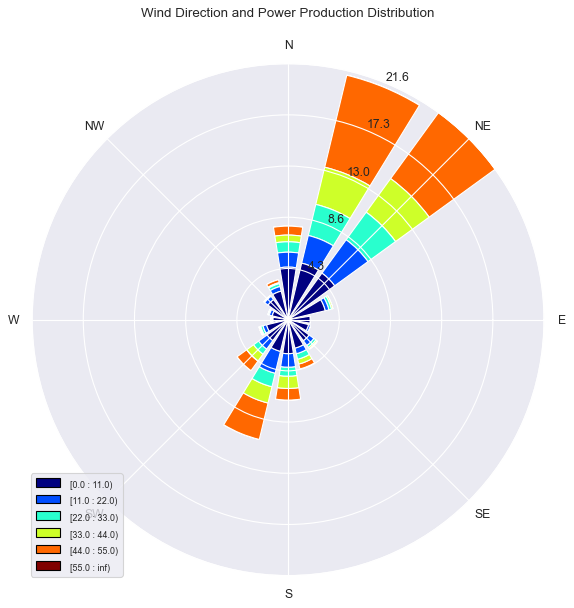

In [17]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()

ax.bar(var = provider1.PowerWOAvailability, direction=provider1.WindDirection,normed=True,  opening=0.8, edgecolor='white')
ax.set_xticklabels(['E', 'NE','N', 'NW',  'W', 'SW', 'S', 'SE'])
#ax.set_theta_zero_location('N')
ax.set_legend()
plt.title("Wind Direction and Power Production Distribution",y=1.08)

In [18]:
provider1

WindSpeed  WindDirection  Temperature  Pressure  Humidity  \
0            2.0          317.0          5.3    100944     80.57   
1            1.9          284.0          5.1    100920     79.70   
2            2.0          270.0          4.8    100895     78.84   
3            2.2          273.0          4.6    100875     77.98   
4            2.2          282.0          4.4    100857     75.21   
...          ...            ...          ...       ...       ...   
12523        3.5           12.0         19.0    100454     64.95   
12524        3.2           15.0         18.3    100546     68.61   
12525        2.9           21.0         17.5    100544     72.26   
12526        2.7           32.0         16.9    100547     72.88   
12527        2.7           37.0         16.2    100550     73.50   

       PowerWOAvailability           Timestamp direction    Month  
0                    1.398 2020-01-01 00:00:00        NW  January  
1                    1.992 2020-01-01 01:00:00         W  January  
2                    2.285 2020-01-01 02:00:00         W  January  
3                    5.529 2020-01-01 03:00:00         W  January  
4                    5.284 2020-01-01 04:00:00         W  January  
...                    ...                 ...       ...      ...  
12523                8.471 2021-06-05 19:00:00         N     June  
12524                6.673 2021-06-05 20:00:00         N     June  
12525                5.775 2021-06-05 21:00:00         N     June  
12526                4.913 2021-06-05 22:00:00        NE     June  
12527                3.558 2021-06-05 23:00:00        NE     June  

[12528 rows x 9 columns]

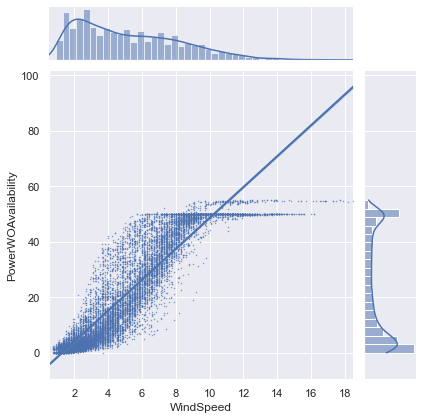

In [19]:
sns.jointplot(data=provider1, x="WindSpeed", y="PowerWOAvailability", kind="reg",scatter_kws={'s':0.2})

In [20]:
from scipy.optimize import curve_fit

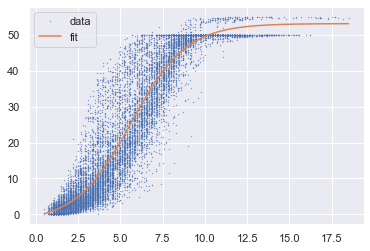

In [21]:
xdata=provider1['WindSpeed'].values
ydata=provider1['PowerWOAvailability'].values

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')

x = np.linspace(min(xdata), max(xdata), 1000)
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'o', label='data',markersize=0.3)
plt.plot(x,y, label='fit')
plt.legend(loc='best')

<AxesSubplot:xlabel='WindSpeed', ylabel='PowerWOAvailability'>

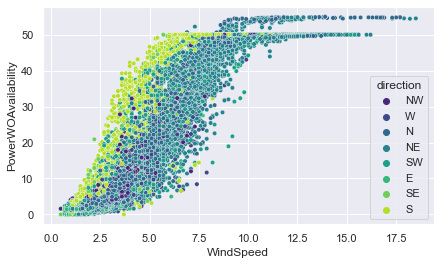

In [22]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=provider1,x='WindSpeed',y='PowerWOAvailability',hue='direction',s=20,palette='viridis')

<AxesSubplot:xlabel='Timestamp', ylabel='PowerWOAvailability'>

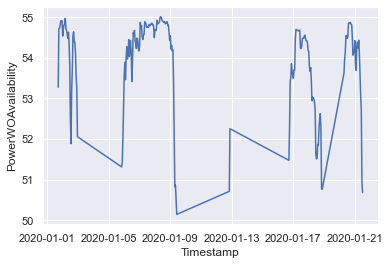

In [23]:
df = provider1.loc[provider1['PowerWOAvailability']>50]
sns.lineplot(data = df,x='Timestamp',y='PowerWOAvailability',)

In [24]:
df.max()

WindSpeed                             18.5
WindDirection                           53
Temperature                            8.5
Pressure                            102650
Humidity                             91.62
PowerWOAvailability                 55.013
Timestamp              2020-01-21 12:00:00
direction                               NE
Month                              January
dtype: object

In [25]:
df2 = pd.read_excel('./Downloads/merge_date.xlsx')

In [26]:
df2

date  pv1_WindSpeed  pv1_WindDirection  pv1_Temperature  \
0     2020-01-01 00:00:00            2.0                317              5.3   
1     2020-01-01 01:00:00            1.9                284              5.1   
2     2020-01-01 02:00:00            2.0                270              4.8   
3     2020-01-01 03:00:00            2.2                273              4.6   
4     2020-01-01 04:00:00            2.2                282              4.4   
...                   ...            ...                ...              ...   
12523 2021-06-05 19:00:00            3.5                 12             19.0   
12524 2021-06-05 20:00:00            3.2                 15             18.3   
12525 2021-06-05 21:00:00            2.9                 21             17.5   
12526 2021-06-05 22:00:00            2.7                 32             16.9   
12527 2021-06-05 23:00:00            2.7                 37             16.2   

       pv1_Pressure  pv1_Humidity  pv1_PowerWOAvailability     pv1_U  \
0            100944         80.57                    1.398  1.363997   
1            100920         79.70                    1.992  1.843562   
2            100895         78.84                    2.285  2.000000   
3            100875         77.98                    5.529  2.196985   
4            100857         75.21                    5.284  2.151925   
...             ...           ...                      ...       ...   
12523        100454         64.95                    8.471 -0.727691   
12524        100546         68.61                    6.673 -0.828221   
12525        100544         72.26                    5.775 -1.039267   
12526        100547         72.88                    4.913 -1.430782   
12527        100550         73.50                    3.558 -1.624901   

              pv1_V  pv2_WindSpeed  ...     pv2_V  pv3_WindSpeed  \
0     -1.462707e+00            NaN  ...       NaN            1.0   
1     -4.596516e-01            NaN  ...       NaN            1.0   
2      3.673940e-16            NaN  ...       NaN            2.0   
3     -1.151391e-01            NaN  ...       NaN            2.0   
4     -4.574057e-01            NaN  ...       NaN            2.0   
...             ...            ...  ...       ...            ...   
12523 -3.423517e+00           2.00  ... -1.896979            4.4   
12524 -3.090963e+00           1.68  ... -1.639859            4.5   
12525 -2.707383e+00           1.69  ... -1.683595            4.3   
12526 -2.289730e+00           1.70  ... -1.698290            3.9   
12527 -2.156316e+00           1.70  ... -1.673551            3.7   

       pv3_WindDirection  pv3_Temperature  pv3_Pressure  pv3_Humidity  \
0                  309.0              6.0           NaN           NaN   
1                  236.0              6.0           NaN           NaN   
2                  233.0              5.0           NaN           NaN   
3                  256.0              5.0           NaN           NaN   
4                  270.0              5.0           NaN           NaN   
...                  ...              ...           ...           ...   
12523               30.0             20.0       97900.0          63.0   
12524               30.0             19.0       97800.0          69.0   
12525               30.0             18.0       97800.0          75.0   
12526               45.0             18.0       97800.0          81.0   
12527               60.0             18.0       97800.0          85.0   

       pv3_PowerWOAvailability     pv3_U         pv3_V  PowerMWh  
0                        3.028  0.777146 -6.293204e-01     3.364  
1                        6.303  0.829038  5.591929e-01     1.606  
2                        7.476  1.597271  1.203630e+00     2.808  
3                        6.590  1.940591  4.838438e-01     2.543  
4                        6.837  2.000000  3.673940e-16     0.093  
...                        ...       ...           ...       ...  
12523                    8.446 -

Text(0.5, 1.0, "Comparison of Providers' Estimation")

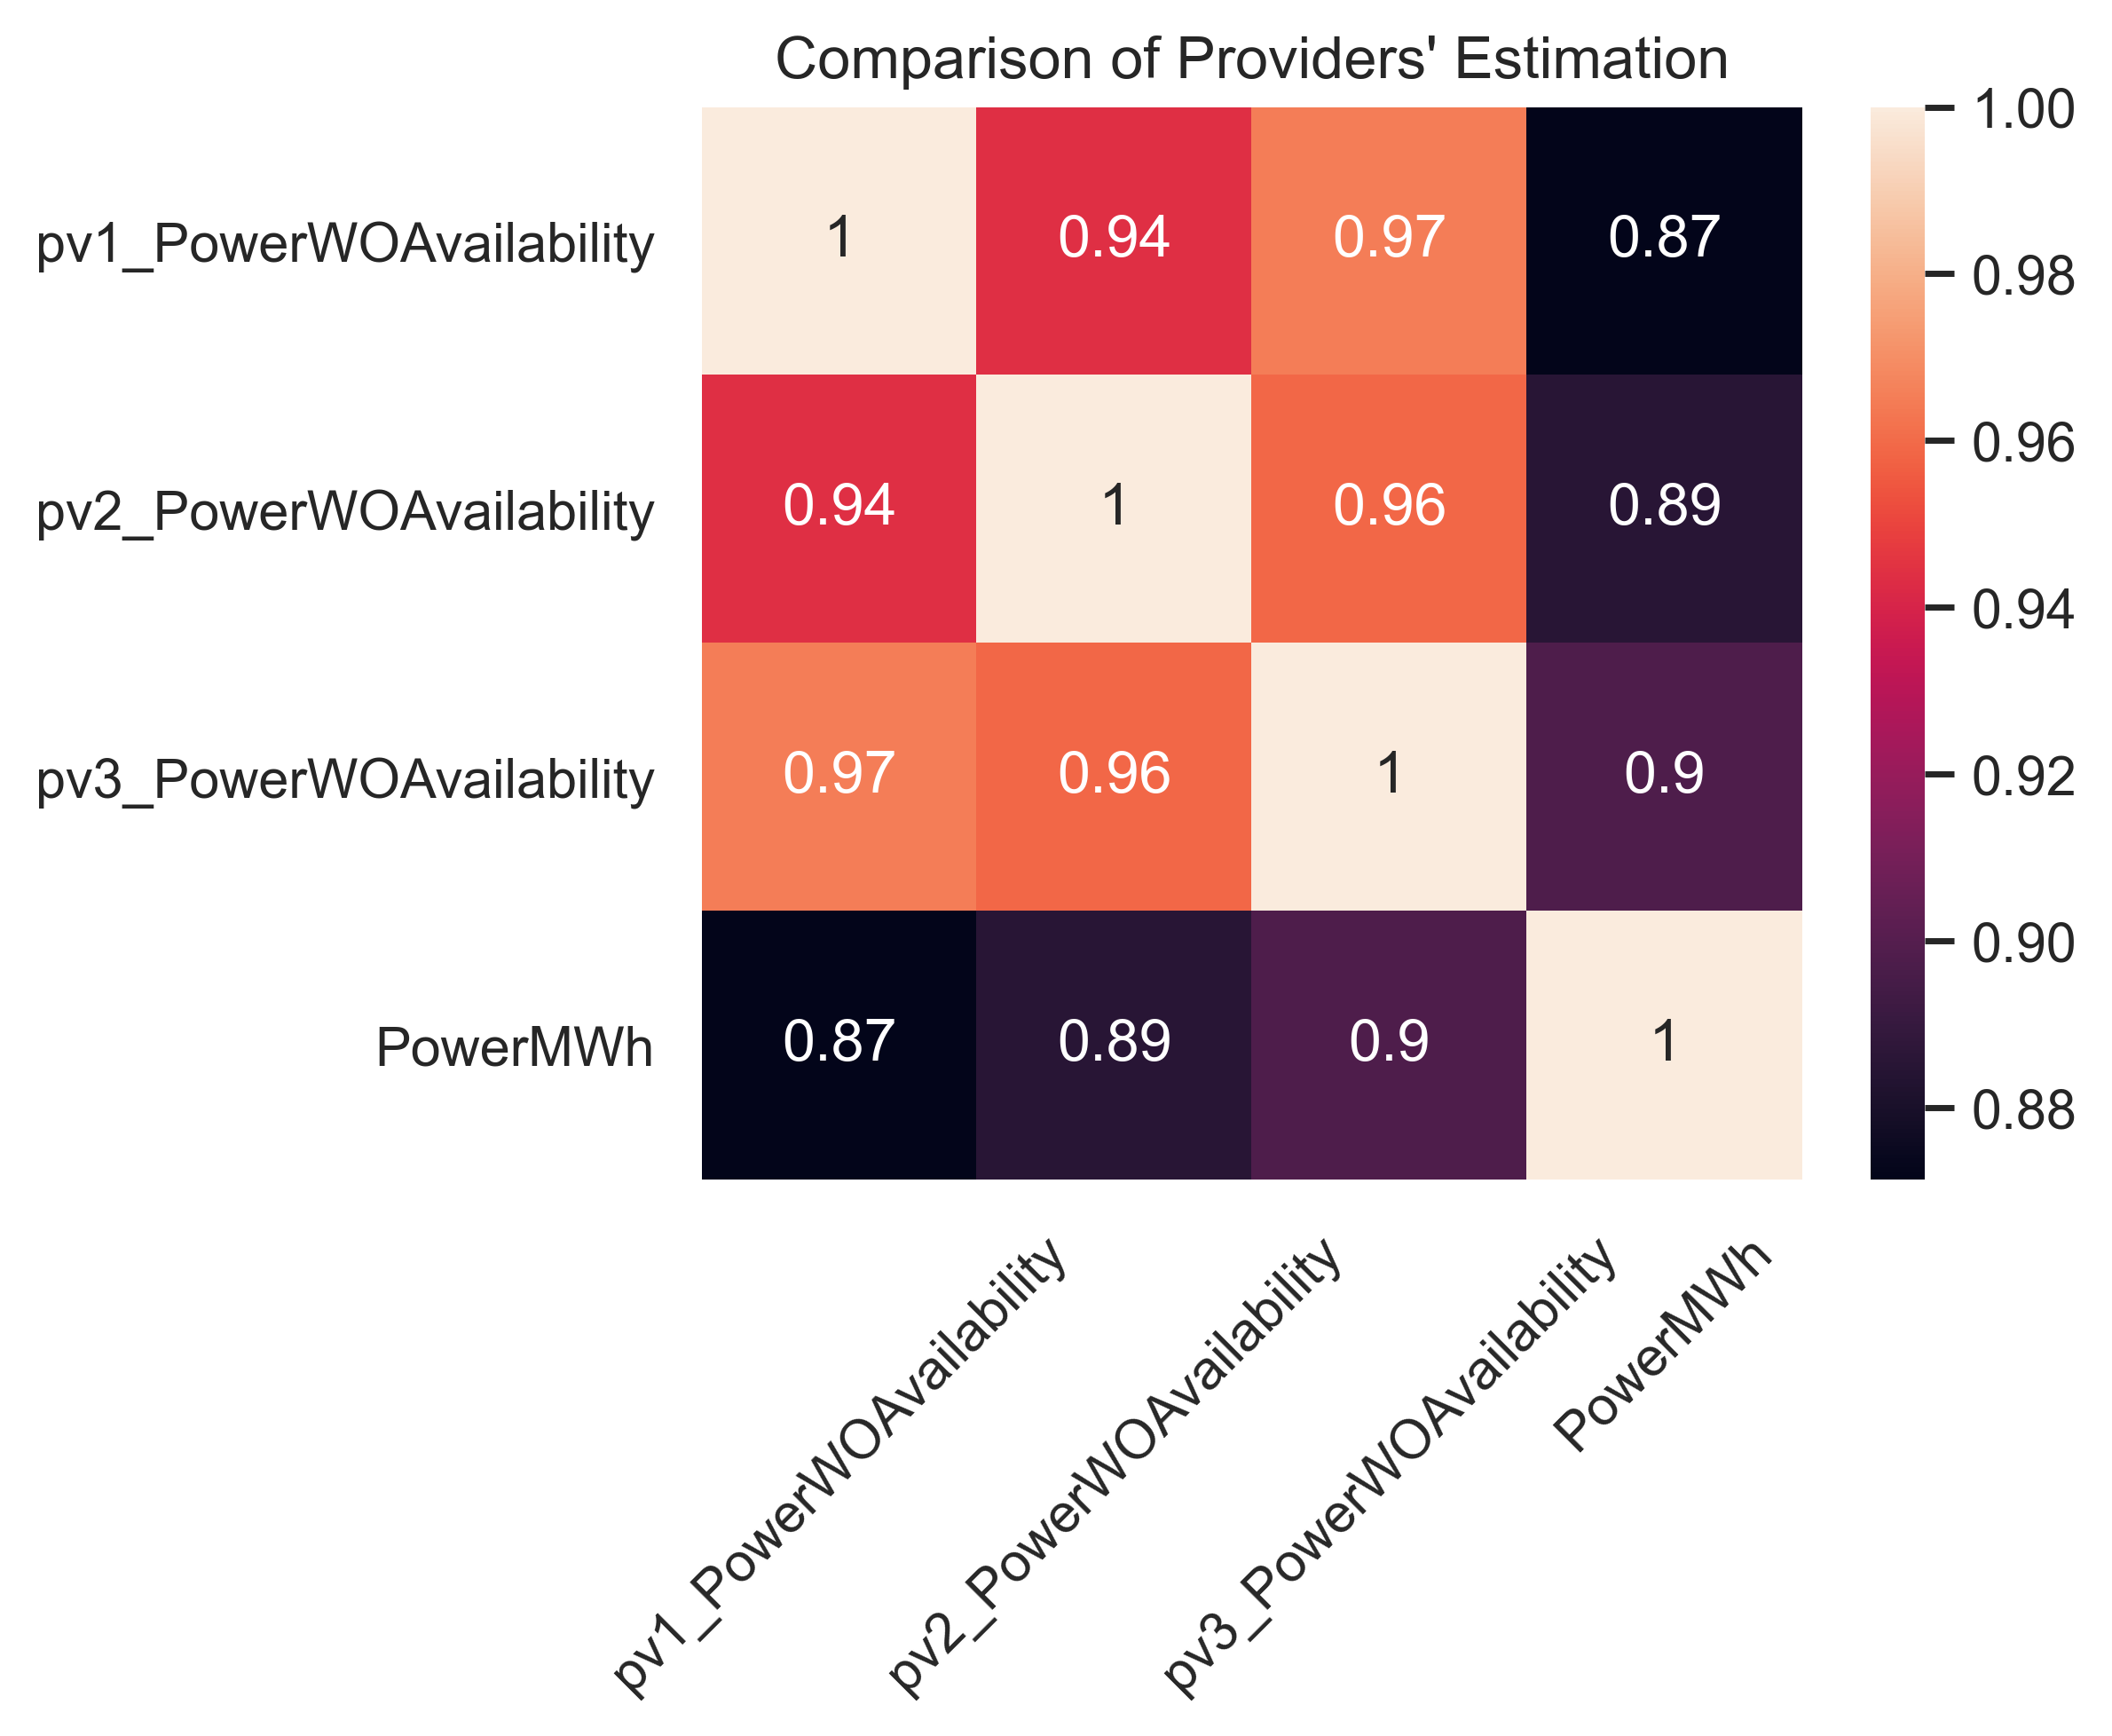

In [27]:
powers = df2[['pv1_PowerWOAvailability','pv2_PowerWOAvailability',
   'pv3_PowerWOAvailability','PowerMWh']]
powers.corr()
plt.figure(figsize=(5,4),dpi=400)
sns.heatmap(powers.corr(),annot=True)
plt.xticks(rotation=45)
plt.title("Comparison of Providers' Estimation")

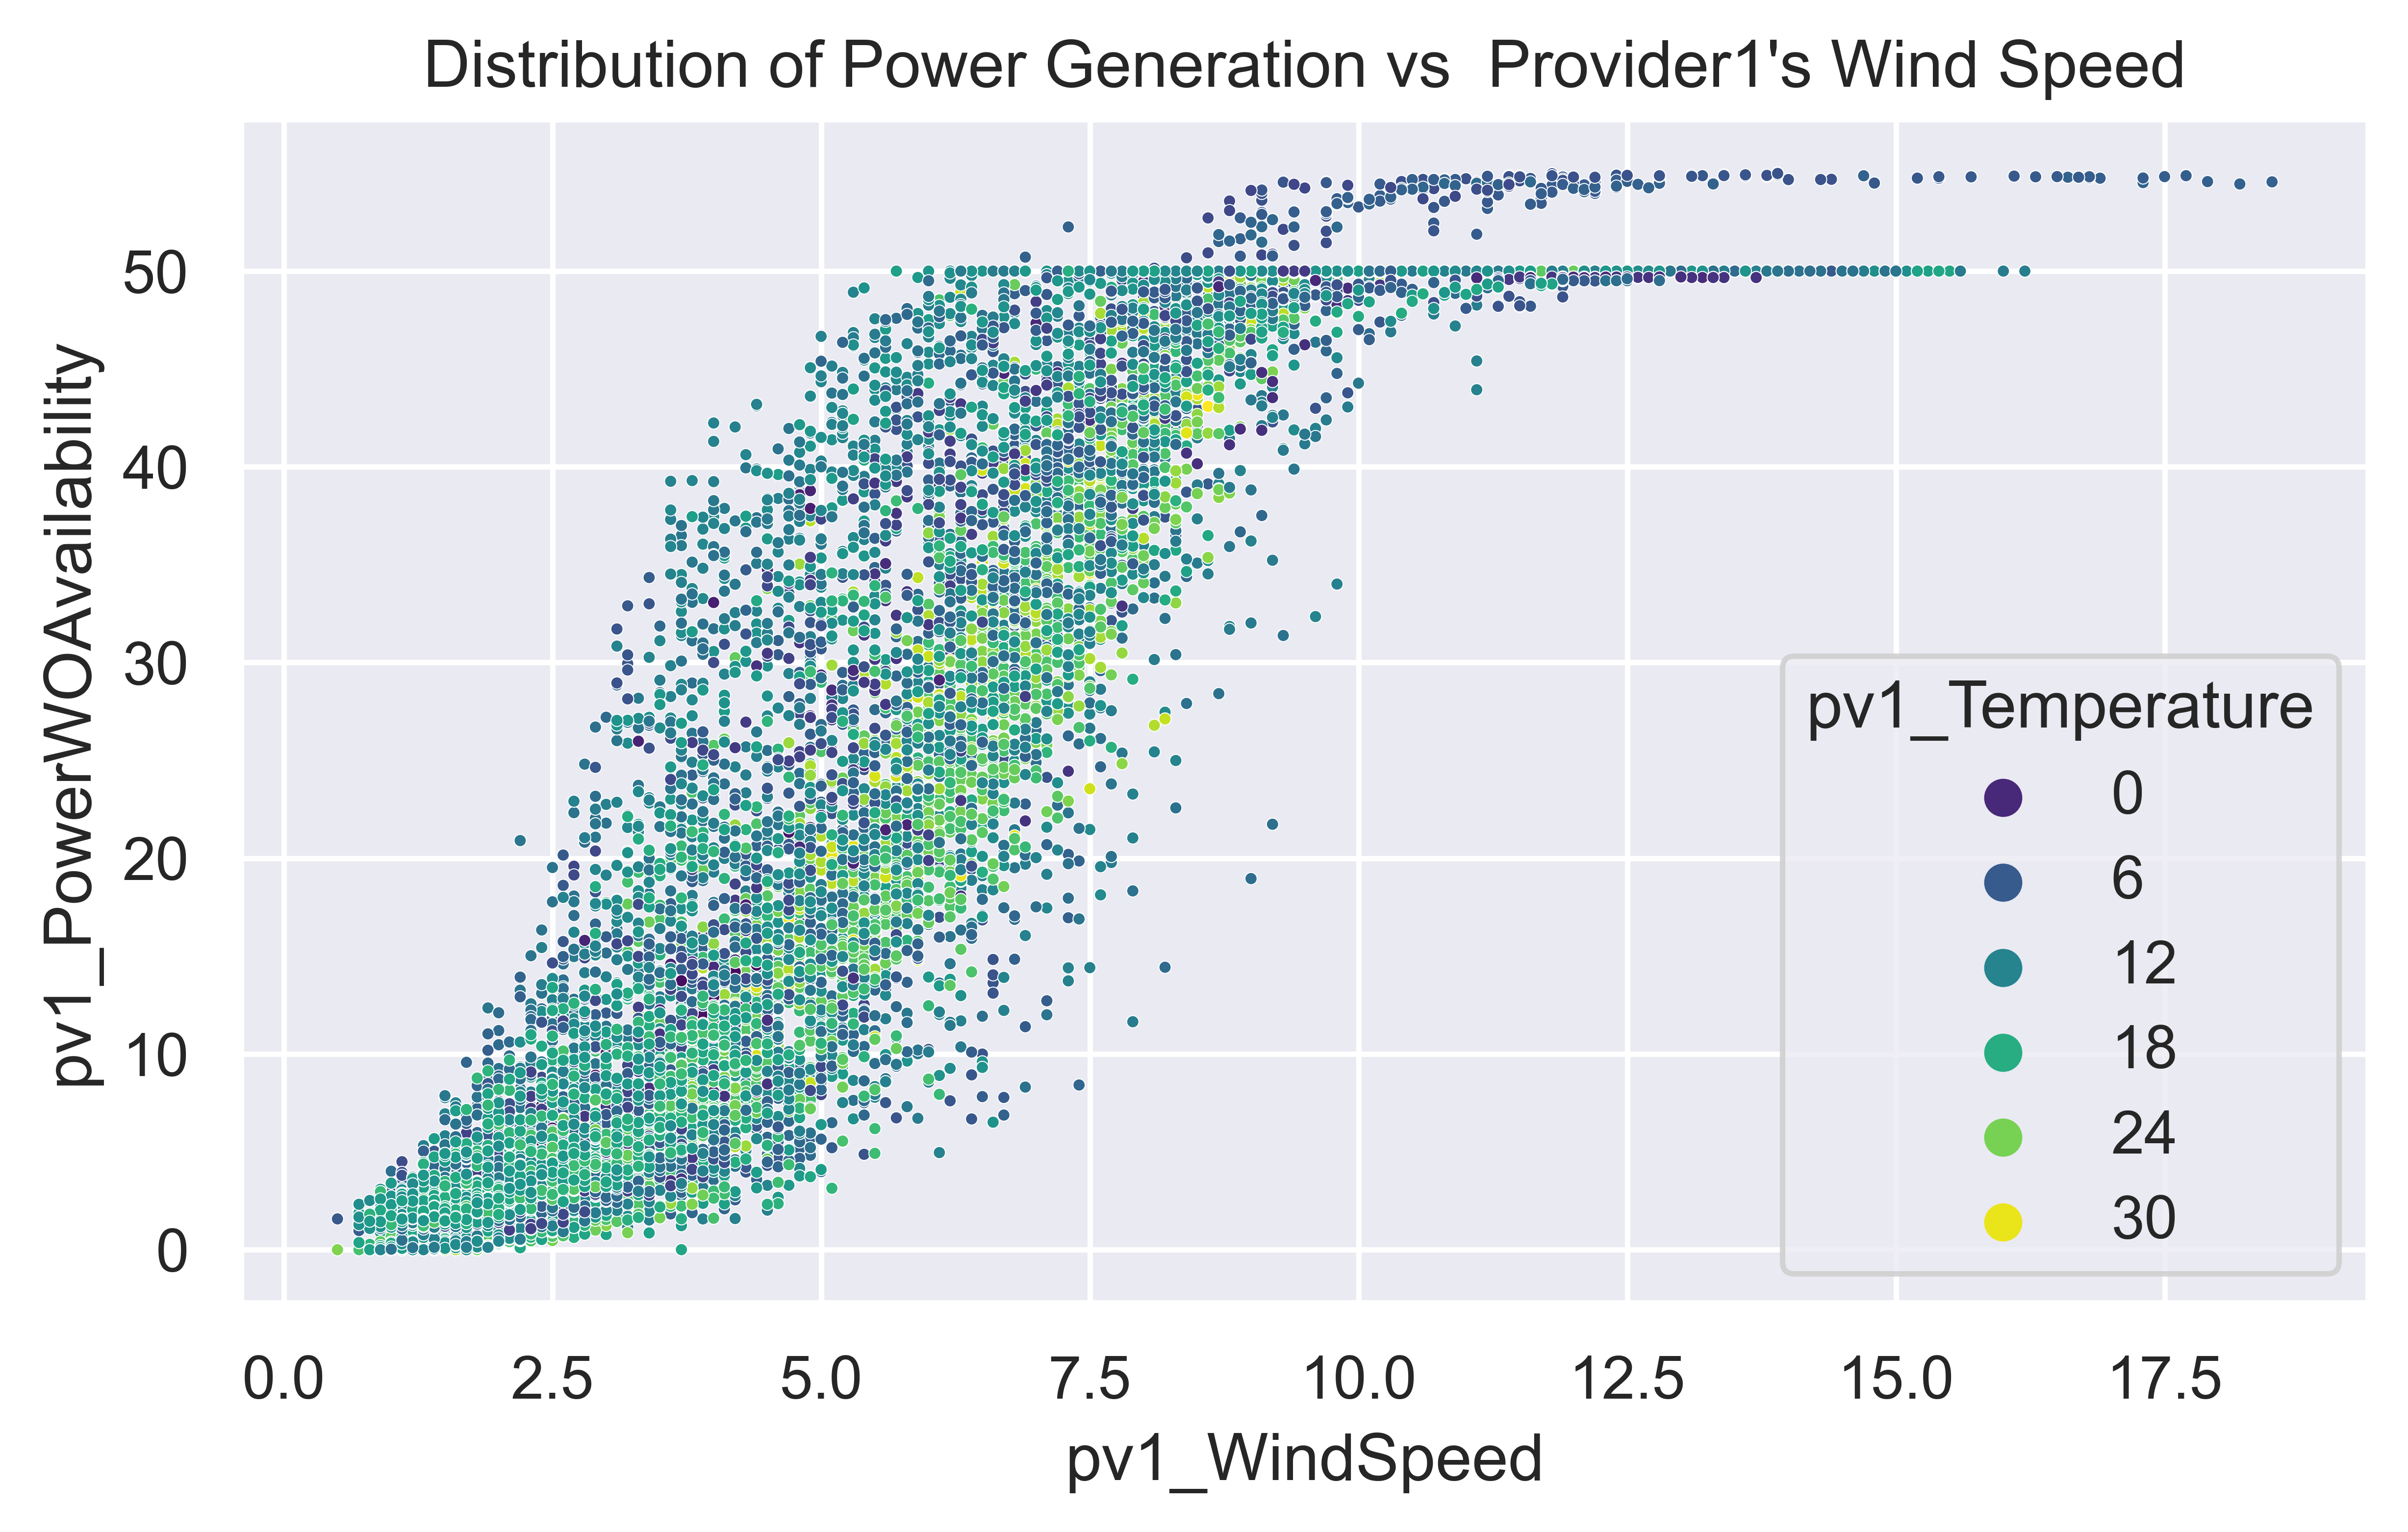

In [28]:
plt.figure(figsize=(7,4),dpi=800)
sns.scatterplot(data=df2,x='pv1_WindSpeed',y='pv1_PowerWOAvailability',hue="pv1_Temperature",s=5,palette='viridis')
plt.title("Distribution of Power Generation vs  Provider1's Wind Speed")
plt.savefig('distplot.png')

# Analyzing missing data percentage

In [29]:
df2.isnull().sum()/df2.shape[0]*100

date                       0.000000
pv1_WindSpeed              0.000000
pv1_WindDirection          0.000000
pv1_Temperature            0.000000
pv1_Pressure               0.000000
pv1_Humidity               0.000000
pv1_PowerWOAvailability    0.000000
pv1_U                      0.000000
pv1_V                      0.000000
pv2_WindSpeed              8.429119
pv2_WindDirection          8.429119
pv2_Temperature            8.429119
pv2_Pressure               8.429119
pv2_Humidity               8.429119
pv2_PowerWOAvailability    0.766284
pv2_U                      8.429119
pv2_V                      8.429119
pv3_WindSpeed              0.191571
pv3_WindDirection          0.191571
pv3_Temperature            0.191571
pv3_Pressure               8.237548
pv3_Humidity               8.237548
pv3_PowerWOAvailability    0.191571
pv3_U                      0.191571
pv3_V                      0.191571
PowerMWh                   0.686462
dtype: float64

In [30]:
df3 = df2.corr()

<AxesSubplot:>

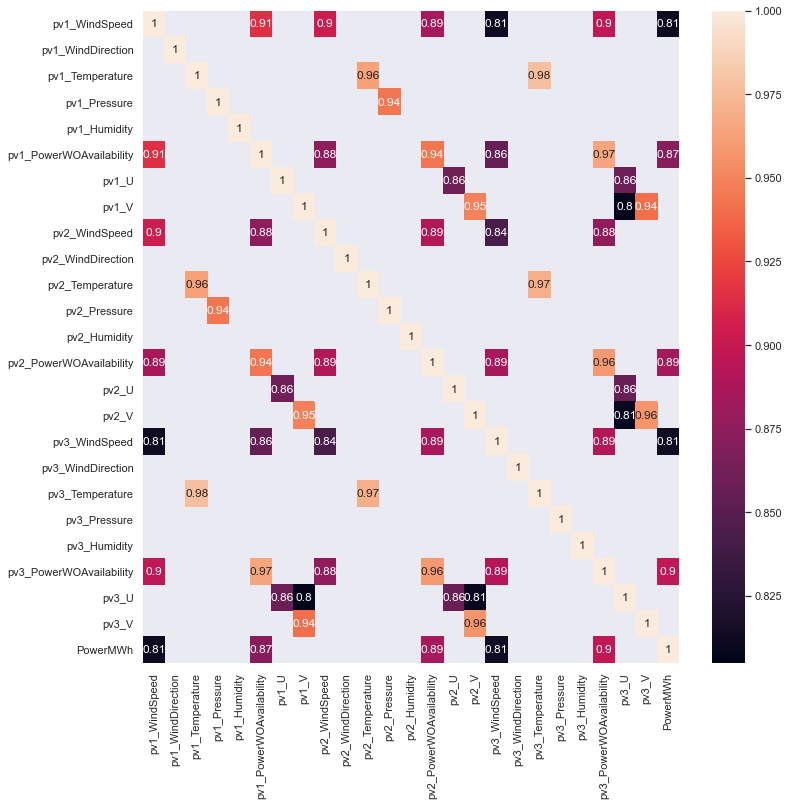

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df3[df3>0.8],annot=True)

## Spearman corelation for better insight results

<AxesSubplot:>

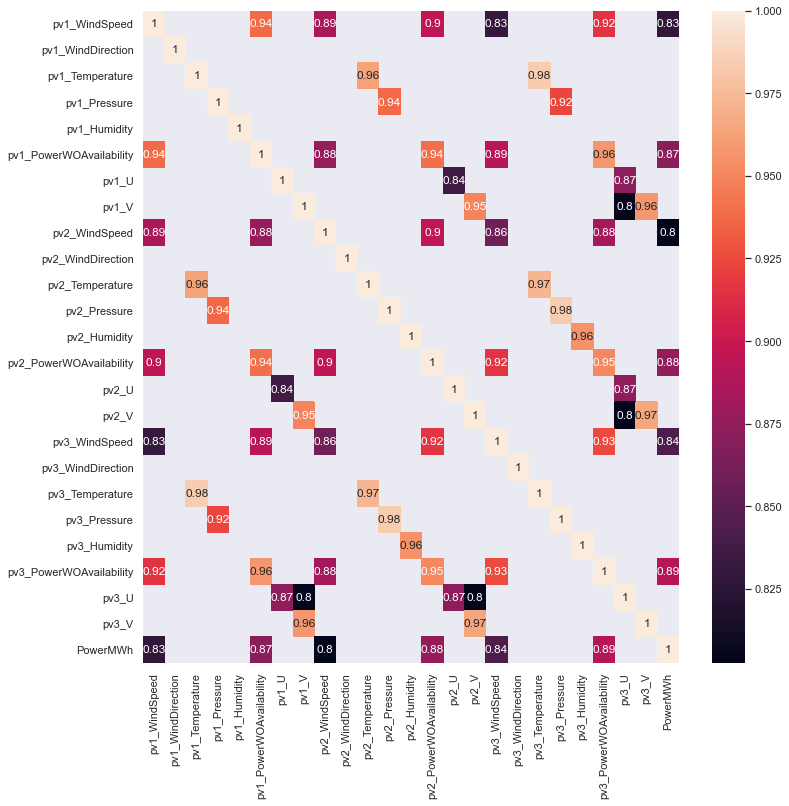

In [32]:
df4=df2.corr(method='spearman')
plt.figure(figsize=(12,12))
sns.heatmap(df4[df4>0.8],annot=True)

In [33]:
xdata=df2.iloc[df2['PowerMWh'].dropna().index]['pv1_WindSpeed'].values
ydata=df2['PowerMWh'].dropna().values

In [34]:
np.argwhere(np.isinf(xdata))

array([], shape=(0, 1), dtype=int64)

In [35]:
np.argwhere(np.isinf(ydata))

array([[3373]], dtype=int64)

In [36]:
ydata[3373]

inf

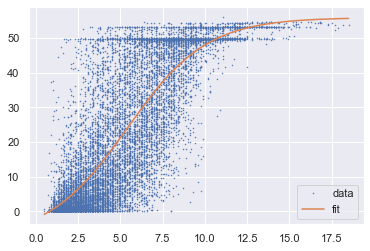

In [37]:
ydata=np.delete(ydata,3373)
xdata=np.delete(xdata,3373)

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')

x = np.linspace(min(xdata), max(xdata), 1000)
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'o', label='data',markersize=0.5)
plt.plot(x,y, label='fit')
plt.legend(loc='best')

In [38]:
['NE','N','SW','SE','NW']
df8 = provider1[provider1.direction.isin(['NE','SW','SE','NW'])]

<AxesSubplot:xlabel='WindSpeed', ylabel='PowerWOAvailability'>

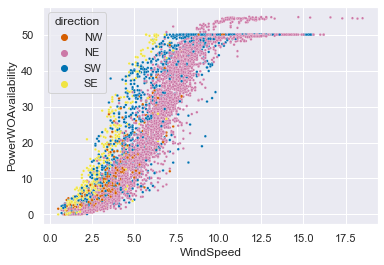

In [39]:
sns.scatterplot(data=df8,x='WindSpeed',y='PowerWOAvailability',hue='direction',palette=sns.color_palette(['#d55e00','#cc79a7','#0072b2','#f0e442']),s=7)

<ipython-input-40-f2b62113da1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['PowerMWh']=df2['PowerMWh']


<AxesSubplot:xlabel='WindSpeed', ylabel='PowerMWh'>

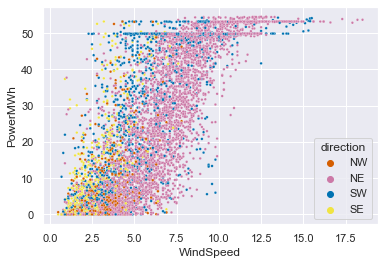

In [40]:
df8['PowerMWh']=df2['PowerMWh']
sns.scatterplot(data=df8,x='WindSpeed',y='PowerMWh',hue='direction',palette=sns.color_palette(['#d55e00','#cc79a7','#0072b2','#f0e442']),s=7)

<AxesSubplot:xlabel='WindSpeed', ylabel='PowerMWh'>

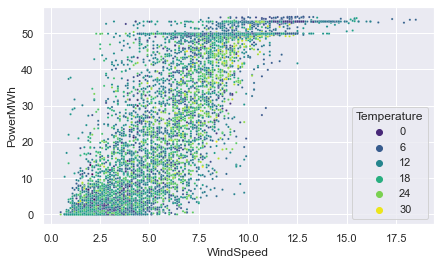

In [41]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df8,x='WindSpeed',y='PowerMWh',hue='Temperature',palette='viridis',s=5)

# Feature Selection

In [42]:
df2.corr()['PowerMWh'].nlargest(23)

PowerMWh                   1.000000
pv3_PowerWOAvailability    0.897666
pv2_PowerWOAvailability    0.885402
pv1_PowerWOAvailability    0.871444
pv3_WindSpeed              0.813276
pv1_WindSpeed              0.811395
pv2_WindSpeed              0.795876
pv1_Humidity               0.111293
pv3_Pressure               0.009241
pv2_Pressure              -0.003554
pv1_Pressure              -0.009364
pv2_Temperature           -0.053298
pv3_Humidity              -0.054515
pv1_Temperature           -0.076667
pv3_Temperature           -0.089136
pv2_Humidity              -0.130751
pv3_V                     -0.132078
pv3_WindDirection         -0.156765
pv3_U                     -0.187232
pv1_WindDirection         -0.223691
pv2_V                     -0.225120
pv1_V                     -0.229547
pv1_U                     -0.252100
Name: PowerMWh, dtype: float64

In [43]:
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor 
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


generation = pd.read_csv("./Downloads/ActualGeneration_Usecase2_v2.csv",sep = ";")
generation.PCTimeStamp = pd.to_datetime(generation.PCTimeStamp)


generation.columns = ["date","PowerMWh"]
generation.index = generation.date
generation.loc[generation.PowerMWh == np.inf,"PowerMWh"] = np.nan



pv1 = pd.read_csv("./Downloads/Provider1_Usecase2.csv",sep = ";")
pv2 = pd.read_csv("./Downloads/Provider2_Usecase2.csv",sep = ";")
pv3 = pd.read_csv("./Downloads/Provider3_Usecase2.csv",sep = ";")

In [44]:
def uv_from_wind(df):
    
    df["U"] =-df.WindSpeed*np.sin((np.pi/180)*df.WindDirection)
    df["V"] =-df.WindSpeed*np.cos((np.pi/180)*df.WindDirection)
    
    return df

def change_col_name(df,pv_name):
    newcol = [pv_name + "_" + x for x in df.columns]
    df.columns = newcol
    
    return df


def add_diff(df,col_name,diff_list):
    if type(diff_list) != list:
        diff_list = [diff_list]
        
    for i in diff_list:
        df[col_name + "_diff_" + str(i)] = df[col_name].diff(i)




    


def make_date(df2,pv_name):
    
    # df2 = pv1 ; pv_name = "pv1"
    
    df = df2.copy()
    
    
    
    date = pd.to_datetime(df.Datekey,format = "%Y%m%d")
    
    hour = pd.to_datetime(df.Hour,format = "%H:%M").dt.hour
    
    date = date + hour.astype("timedelta64[h]")

    df.insert(0,"date",date)
    
    df.index = df.date
    
    
    
    df = df[['WindSpeed', 'WindDirection',
       'Temperature', 'Pressure', 'Humidity', 'PowerWOAvailability']]
    

        
    
    if df.Humidity.mean() < 1:
        df.Humidity = df.Humidity * 100 

    df.Pressure = df.Pressure / 100

    for col in ["Pressure","Temperature"]:
        
        add_diff(df,col,[1,2])
    
    df = uv_from_wind(df)
    
    df= change_col_name(df,pv_name)
    
    return df

In [45]:
pv1 = make_date(pv1,"pv1")    
pv2 = make_date(pv2,"pv2")
pv3 = make_date(pv3,"pv3")

In [46]:
dc = {"pv2":pv2,"pv3":pv3,"generation":generation[["PowerMWh"]]}

df_all = pv1.copy()

In [47]:
for key in dc.keys():

    df_all = df_all.merge(dc[key],left_index = True,right_index = True,how = "outer")


In [48]:
scaler = MinMaxScaler()

# Our models
* Random Forest Regressor
* XGBoost
* Linear Regressor

In [49]:
model_rf = RandomForestRegressor(n_estimators=110,max_depth=70,min_samples_split=3,n_jobs=-1)
# model_rf = GradientBoostingRegressor()

model_xgb = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=2,
    gamma=0,
    max_depth=3,nthread = 8)


model_linear = LinearRegression()


models = ({"model_rf" : model_rf,"model_xgb":model_xgb,"model_linear":model_linear})

In [50]:
df_all["saat"] = df_all.index.hour
df_all["ay"] = df_all.index.month

In [51]:
def add_sincos_encode(df,col_name,max_number,col_arr = False):

    """
    Sinusoidal encoding for cyclic parameters.
    """
    if col_arr == False:
        col_arr = df[col_name]
    
    df[col_name + '_cos'] = col_arr.apply(lambda x:  np.cos(2*np.pi*((x)/max_number) ) )
    df[col_name + '_sin'] = col_arr.apply(lambda x:  np.sin(2*np.pi*((x)/max_number) ) )

In [52]:
add_sincos_encode(df_all, "saat", 23)
add_sincos_encode(df_all, "ay", 12)

In [53]:
df_test = df_all[df_all.index > "2020-02-01"].dropna()

In [54]:
df_test.columns

Index(['pv1_WindSpeed', 'pv1_WindDirection', 'pv1_Temperature', 'pv1_Pressure',
       'pv1_Humidity', 'pv1_PowerWOAvailability', 'pv1_Pressure_diff_1',
       'pv1_Pressure_diff_2', 'pv1_Temperature_diff_1',
       'pv1_Temperature_diff_2', 'pv1_U', 'pv1_V', 'pv2_WindSpeed',
       'pv2_WindDirection', 'pv2_Temperature', 'pv2_Pressure', 'pv2_Humidity',
       'pv2_PowerWOAvailability', 'pv2_Pressure_diff_1', 'pv2_Pressure_diff_2',
       'pv2_Temperature_diff_1', 'pv2_Temperature_diff_2', 'pv2_U', 'pv2_V',
       'pv3_WindSpeed', 'pv3_WindDirection', 'pv3_Temperature', 'pv3_Pressure',
       'pv3_Humidity', 'pv3_PowerWOAvailability', 'pv3_Pressure_diff_1',
       'pv3_Pressure_diff_2', 'pv3_Temperature_diff_1',
       'pv3_Temperature_diff_2', 'pv3_U', 'pv3_V', 'PowerMWh', 'saat', 'ay',
       'saat_cos', 'saat_sin', 'ay_cos', 'ay_sin'],
      dtype='object')

In [55]:
"""cols = ['pv1_WindSpeed', 'pv1_Temperature', 'pv1_Pressure',
       'pv1_Humidity', 'pv1_PowerWOAvailability', 'pv1_Pressure_diff_1',
       'pv1_Pressure_diff_2', 'pv1_Temperature_diff_1',
       'pv1_Temperature_diff_2', 'pv1_U', 'pv1_V', 'pv2_WindSpeed',
       'pv2_Temperature', 'pv2_Pressure', 'pv2_Humidity',
       'pv2_PowerWOAvailability', 'pv2_Pressure_diff_1',
       'pv2_Pressure_diff_2', 'pv2_Temperature_diff_1',
       'pv2_Temperature_diff_2', 'pv2_U', 'pv2_V', 'pv3_WindSpeed',
       'pv3_Temperature', 'pv3_Pressure', 'pv3_Humidity',
       'pv3_PowerWOAvailability', 'pv3_Pressure_diff_1',
       'pv3_Pressure_diff_2', 'pv3_Temperature_diff_1',
       'pv3_Temperature_diff_2', 'pv3_U', 'pv3_V','saat_cos', 'saat_sin', 'ay_cos', 'ay_sin']"""

cols = ['pv1_WindSpeed', 'pv1_WindDirection', 'pv1_Temperature', 'pv1_Pressure',
       'pv1_Humidity', 'pv1_PowerWOAvailability', 'pv1_Pressure_diff_1',
       'pv1_Pressure_diff_2', 'pv1_Temperature_diff_1',
       'pv1_Temperature_diff_2', 'pv1_U', 'pv1_V', 'pv2_WindSpeed',
       'pv2_Temperature', 'pv2_Pressure', 'pv2_Humidity',
       'pv2_PowerWOAvailability', 'pv2_Pressure_diff_1', 'pv2_Pressure_diff_2',
       'pv2_Temperature_diff_1', 'pv2_Temperature_diff_2', 'pv2_U', 'pv2_V',
       'pv3_WindSpeed', 'pv3_Temperature', 'pv3_Pressure',
       'pv3_Humidity', 'pv3_PowerWOAvailability', 'pv3_Pressure_diff_1',
       'pv3_Pressure_diff_2', 'pv3_Temperature_diff_1',
       'pv3_Temperature_diff_2', 'pv3_U', 'pv3_V','saat_cos', 'saat_sin', 'ay_cos', 'ay_sin']

In [56]:
df2 = pd.DataFrame(columns = list(df_test.columns) + ['model_rf', 'model_xgb', 'model_linear'])

In [57]:
for i in range(11):
    day_time = 15    
    start_time = dt.datetime(2021,1,1) + dt.timedelta(day_time * i ) 
    end_time = start_time + dt.timedelta( day_time ) 
    
    train_time = start_time + dt.timedelta(- 2 ) 
    
    train = df_test[df_test.index < train_time]
    test = df_test[(df_test.index >= start_time) & (df_test.index < end_time)]
    
    if len(test) > 0:
        
        for model in models.keys():
            
            models[model].fit(train[cols],train.PowerMWh)
            
            pred = models[model].predict(test[cols])
            pred[pred <=0] = 0 
            
            test[model] = pred
        
    
        
        df2 = pd.concat([df2,test])

In [58]:
pred_cols = ["pv1_PowerWOAvailability","pv2_PowerWOAvailability","pv3_PowerWOAvailability",'model_rf',
       'model_xgb', 'model_linear']

In [59]:
mape_cols = []
for i in pred_cols:
    
    df2[i + "_rmse"] = abs(df2[i] - df2.PowerMWh)**2
    mape_cols.append(i + "_rmse")


np.sqrt(df2[mape_cols].mean())

pv1_PowerWOAvailability_rmse    10.442355
pv2_PowerWOAvailability_rmse    10.137397
pv3_PowerWOAvailability_rmse     9.532857
model_rf_rmse                    9.663190
model_xgb_rmse                   9.926055
model_linear_rmse                9.399079
dtype: float64

In [60]:
df_all.corr()["PowerMWh"].nlargest(10).index

Index(['PowerMWh', 'pv3_PowerWOAvailability', 'pv2_PowerWOAvailability',
       'pv1_PowerWOAvailability', 'pv3_WindSpeed', 'pv1_WindSpeed',
       'pv2_WindSpeed', 'ay_cos', 'pv1_Humidity', 'pv1_Pressure_diff_2'],
      dtype='object')

In [61]:
cols = ['pv1_WindSpeed', 'pv1_WindDirection', 'pv1_Temperature', 'pv1_Pressure',
       'pv1_Humidity', 'pv1_PowerWOAvailability', 'pv1_Pressure_diff_1',
       'pv1_Pressure_diff_2', 'pv1_Temperature_diff_1',
       'pv1_Temperature_diff_2', 'pv1_U', 'pv1_V', 'pv2_WindSpeed',
       'pv2_Temperature', 'pv2_Pressure', 'pv2_Humidity',
       'pv2_PowerWOAvailability', 'pv2_Pressure_diff_1', 'pv2_Pressure_diff_2',
       'pv2_Temperature_diff_1', 'pv2_Temperature_diff_2', 'pv2_U', 'pv2_V',
       'pv3_WindSpeed', 'pv3_Temperature', 'pv3_Pressure',
       'pv3_Humidity', 'pv3_PowerWOAvailability', 'pv3_Pressure_diff_1',
       'pv3_Pressure_diff_2', 'pv3_Temperature_diff_1',
       'pv3_Temperature_diff_2', 'pv3_U', 'pv3_V','saat_cos', 'saat_sin', 'ay_cos', 'ay_sin']

In [62]:
train = df_test[df_test.index < "2021-06-04"]

df_today = df_all[df_all.index >= "2021-06-05"]

In [63]:
# Real generation data of 5th of June, courtesy of Borusan
actual_generation = [2.318584071,1.389380531,0.9911504425,0.9911504425,0.8584070796,0.5044247788,0.2389380531,0.1150442478,0.2920353982,0.1592920354,0.1946902655,0.9026548673,2.008849558,2.982300885,3.601769912,3.734513274,3.955752212,4.044247788,3.690265487,3.07079646,3.07079646,2.982300885,2.14159292,0.9469026549]

Data above demanded from Borusan to calculate imbalance cost for our presentation so it was after we submitted the report.

In [64]:
df_today["PowerMWh"] = actual_generation
df_today["PowerMWh"]

date
2021-06-05 00:00:00    2.318584
2021-06-05 01:00:00    1.389381
2021-06-05 02:00:00    0.991150
2021-06-05 03:00:00    0.991150
2021-06-05 04:00:00    0.858407
2021-06-05 05:00:00    0.504425
2021-06-05 06:00:00    0.238938
2021-06-05 07:00:00    0.115044
2021-06-05 08:00:00    0.292035
2021-06-05 09:00:00    0.159292
2021-06-05 10:00:00    0.194690
2021-06-05 11:00:00    0.902655
2021-06-05 12:00:00    2.008850
2021-06-05 13:00:00    2.982301
2021-06-05 14:00:00    3.601770
2021-06-05 15:00:00    3.734513
2021-06-05 16:00:00    3.955752
2021-06-05 17:00:00    4.044248
2021-06-05 18:00:00    3.690265
2021-06-05 19:00:00    3.070796
2021-06-05 20:00:00    3.070796
2021-06-05 21:00:00    2.982301
2021-06-05 22:00:00    2.141593
2021-06-05 23:00:00    0.946903
Name: PowerMWh, dtype: float64

In [65]:
for model in models.keys():
    
    models[model].fit(train[cols],train.PowerMWh)
    
    pred = models[model].predict(df_today[cols])
    pred[pred <=0] = 0 
    
    df_today[model] = pred

In [66]:
pred_cols = ["pv1_PowerWOAvailability","pv2_PowerWOAvailability","pv3_PowerWOAvailability",'model_rf',
        'model_xgb', 'model_linear',"PowerMWh"]

pred_cols2 = ["pv1_PowerWOAvailability","pv2_PowerWOAvailability","pv3_PowerWOAvailability",
         'model_linear',"PowerMWh"]

In [67]:
mape_cols = []
for i in pred_cols:    
    df_today[i + "_mape"] = (df_today[i] - df_today.PowerMWh)**2
    mape_cols.append(i + "_mape")

In [68]:
for model in models.keys():
    
    models[model].fit(train[cols],train.PowerMWh)
    
    pred = models[model].predict(df_today[cols])
    pred[pred <=0] = 0 
    
    df_today[model] = pred

In [69]:
np.sqrt(df_today[mape_cols].mean())

pv1_PowerWOAvailability_mape    3.911535
pv2_PowerWOAvailability_mape    6.592079
pv3_PowerWOAvailability_mape    4.510258
model_rf_mape                   3.604314
model_xgb_mape                  3.128648
model_linear_mape               2.520797
PowerMWh_mape                   0.000000
dtype: float64

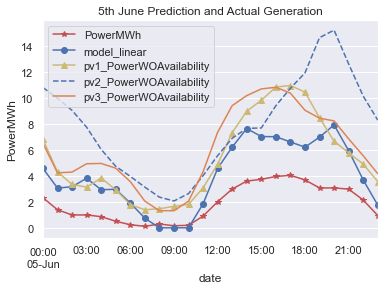

In [70]:
xx = df_today[["model_linear"]]

# xx.to_excel("5mayis_tahmin.xlsx")

xx =df_today[["PowerMWh","model_linear",'pv1_PowerWOAvailability','pv2_PowerWOAvailability','pv3_PowerWOAvailability']]

xx.plot(style=['r*-','bo-','y^-',"--"])
plt.ylabel("PowerMWh")
plt.title("5th June Prediction and Actual Generation")

xx.to_excel("dengesizlik.xlsx")

<AxesSubplot:xlabel='date', ylabel='PowerMWh'>

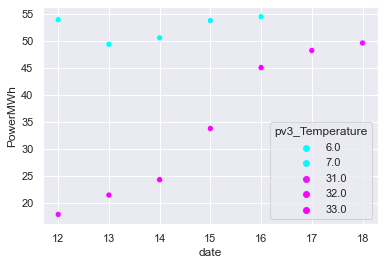

In [71]:
t = df_all[['pv3_Temperature',"pv3_WindSpeed","PowerMWh"]]

x1 = t[(t.pv3_Temperature>30) & (t.pv3_WindSpeed>10)]
x2 = t[(t.pv3_WindSpeed>10) & t.index.hour.isin([12,13,14,15,16])].head(5)

x3 = pd.concat([x1,x2])

import seaborn as sns
sns.set()
sns.scatterplot(data = x3,x =x3.index.hour,y = "PowerMWh",hue = "pv3_Temperature",palette = "cool")